# Automating a Weather Emergency Response System with LangGraph

## Overview
This project demonstrates how to create an automated **Weather Emergency Response System** using **LangGraph**. The system monitors weather conditions, analyzes potential disasters, and generates emergency response plans. It integrates real-time weather data with generative AI for disaster analysis and response generation.

---

## Motivation
Efficient disaster response is crucial for minimizing damage and ensuring public safety. By leveraging automation and AI, this system aims to provide real-time weather monitoring and intelligent decision-making, streamlining emergency responses and reducing human error.

---

## Key Components

### **State Management**
- Utilizes **TypedDict** to manage the state of each weather monitoring workflow, including weather data, disaster analysis, and response plans.

### **Weather Data Retrieval**
- Fetches live weather data using the **OpenWeatherMap API**.
- Simulates weather scenarios for testing purposes.

### **Disaster Analysis**
- Employs a generative AI model (**gemini-1.5-flash**) to:
  - Identify potential disasters (e.g., floods, storms, heatwaves).
  - Assess the severity of weather events.

### **Response Generation**
- Creates tailored response plans based on disaster type and severity, including:
  - Emergency responses.
  - Civil defense actions.
  - Public works measures.

### **Human Verification**
- Automates approval for **high/critical** severity events.
- Requires manual verification for **low/medium** severity events.

### **Email Alerts**
- Sends detailed weather alerts to predefined recipients using SMTP.
- Alerts include disaster details, severity, and response plans.

### **Data Logging**
- Logs all weather data, analysis, and responses to a local file for auditing.

### **Workflow Graph**
- Uses **LangGraph** to design a flexible workflow, enabling seamless integration of weather data, AI analysis, and response mechanisms.

---

## Method Details

### **Initialization**
- Sets up the environment and imports required libraries, including `requests` for API calls, `schedule` for periodic monitoring, and LangGraph for workflow management.

### **State Definition**
- Defines the structure of the workflow state, holding:
  - Weather data.
  - Disaster analysis results.
  - Severity levels.
  - Response plans.
  - Social media monitoring results.

### **Node Functions**
- Implements functions for each workflow step:
  - **Weather Data Retrieval**: Fetches or simulates weather data.
  - **Social Media Monitoring**: Analyzes social media reports for corroborative weather information.
  - **Disaster Analysis**: Identifies potential disasters using generative AI.
  - **Severity Assessment**: Determines the severity level of the disaster.
  - **Response Generation**: Prepares actionable emergency, civil defense, or public works plans.
  - **Email Notifications**: Sends alerts with disaster details and response plans.

### **Graph Construction**
- Constructs the workflow using **StateGraph**, defining nodes and edges to represent each process:
  - Nodes include data retrieval, analysis, response generation, and email alerts.
  - Conditional edges route workflows based on disaster severity and type.

### **Conditional Routing**
- Implements logic to:
  - Route disasters to appropriate response plans based on type and severity.
  - Handle human verification for low/medium severity events.

### **Workflow Compilation**
- Compiles the graph into an executable application, enabling real-time processing of weather data and automated decision-making.

### **Execution**
- Runs the system to monitor weather conditions for specified cities.
- Scheduled monitoring ensures continuous operation.

---

## Conclusion
This project showcases the power of **LangGraph** in creating AI-driven workflows for real-time disaster management. By combining automated data retrieval, generative AI analysis, and intelligent workflows, the system provides a robust framework for emergency response.

### Applications
- This approach can be extended to other domains, such as traffic management, supply chain monitoring, and environmental protection.
- With integration into existing emergency systems, it offers a scalable and customizable solution for various disaster management needs.










================================================**OK, let's start.**================================================

##  **1. Installation of Required Packages**



In [ ]:
%%capture --no-stderr
%pip install -U langgraph langsmith langchain langchain_google_genai langchain_community schedule

**Notebook Commands and Package Installations**

**Purpose**

- **Suppress Output**: `%%capture --no-stderr` suppresses the output of the cell, including errors (`--no-stderr` ensures that error messages are not displayed).
- **Use Case**: Helpful when running long or noisy commands like `pip install` in a notebook to avoid cluttering the output.

**Magic Command for Package Installation**

- **Command**: `%pip install -U`
- **Details**:
  - `%pip`: A magic command for installing Python packages directly from within a notebook.
  - `-U`: Ensures all specified packages are upgraded to the latest version.

**Packages Being Installed**

- **langgraph**: For building and interacting with knowledge graphs.
- **langsmith**: For debugging and monitoring LLM applications.
- **langchain**: A framework for building applications powered by large language models (LLMs).
- **langchain_google_genai**: Integration between LangChain and Google Gemini AI for enhanced functionality.
- **langchain_community**: Community-contributed LangChain integrations.
- **schedule**: A simple Python library for scheduling tasks.


## **2. Call Credentials and Set API Keys:**


This code retrieves API keys (GEMINI_API_KEY and W_API_KEY) from Colab's userdata and sets them as environment variables.Get your code for free from below link and please use below veriable names `GEMINI_API_KEY`& `W_API_KEY` without changing in Colab secret keys.

* GEMINI_API_KEY = ['Get and paste Your GEMINI API KEY'](https://ai.google.dev/gemini-api/docs/api-key)

* W_API_KEY = ['Get and paste Your Weather API KEY'](https://home.openweathermap.org/api_keys)

In [ ]:
import os
from google.colab import userdata
gemini_api_key = userdata.get('GEMINI_API_KEY')
API_KEY = userdata.get('W_API_KEY')
os.environ["API_KEY"] = API_KEY
os.environ["GOOGLE_API_KEY"] = gemini_api_key

**Secure API Key Management and External API Integration**

**Code Breakdown**

- **`import os`**
  - Imports Python's standard library module `os`, which provides tools to interact with the operating system.
  - **Use Case**: Sets environment variables for secure credential handling.

- **`from google.colab import userdata`**
  - Imports `userdata` from Google Colab's library, allowing access to user-defined secrets (e.g., API keys) stored in Colab's runtime environment.

- **`gemini_api_key = userdata.get('GEMINI_API_KEY')`**
  - Retrieves the API key stored in Colab's secrets under the name `GEMINI_API_KEY`.
  - Likely used for accessing Google's Gemini Generative AI services.
  you can get [Gemini Free API Key](https://ai.google.dev/gemini-api/docs/api-key)

- **`API_KEY = userdata.get('W_API_KEY')`**
  - Retrieves another API key stored in Colab's secrets under the name `W_API_KEY`.
  - May be for OpenWeatherMap or another external service.
  you can get [OpenWeatheMap free Api key](https://home.openweathermap.org/api_keys)

- **`os.environ["API_KEY"] = API_KEY`**
  - Sets the retrieved `W_API_KEY` as an environment variable named `API_KEY`.
  - Environment variables securely pass configuration settings like API keys to the application.

- **`os.environ["GOOGLE_API_KEY"] = gemini_api_key`**
  - Sets the retrieved `GEMINI_API_KEY` as an environment variable named `GOOGLE_API_KEY`.
  - Ensures availability for libraries or APIs requiring Google services authentication.

**Purpose**

1. **Secure Retrieval of Secrets**
   - Uses `userdata.get()` to fetch API keys securely from Colab's secret management system.
   - Prevents hardcoding sensitive information into the code.

2. **Setting Environment Variables**
   - Leverages environment variables for safe and standardized sharing of sensitive credentials across the application.

3. **Integration with External APIs**
   - Enables interaction with external APIs like Google Gemini (Generative AI) and weather-related services.

**Use Case**

This approach is ideal for:

- **Applications in Google Colab**: Securely fetching API keys stored in Colab's runtime environment.
- **Authentication with External APIs**: Simplifies authentication by dynamically setting required credentials via environment variables.
- **Sensitive Information Management**: Ensures sensitive keys remain secure and are not exposed within the codebase.


## **3. Standard Library Imports**

In [ ]:
import os
import random
import requests
import schedule
import time
from typing import Dict, TypedDict, Union, List, Literal
import json
from datetime import datetime
from langgraph.graph import StateGraph, END
from langchain_core.prompts import ChatPromptTemplate
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

**Code Imports and Their Purpose**

### **1. Standard Library Imports**

- **`os`**
  - **Purpose**: Provides tools to interact with the operating system.
  - **Use Case**: Managing environment variables (e.g., storing API keys securely).

- **`random`**
  - **Purpose**: Generates random numbers or selections.
  - **Use Case**: Used for random sampling or generation.

- **`requests`**
  - **Purpose**: A popular library for making HTTP requests.
  - **Use Case**: Interacting with RESTful APIs (e.g., fetching weather data).

- **`schedule`**
  - **Purpose**: A lightweight library for scheduling periodic tasks.
  - **Use Case**: Automating repetitive tasks like fetching data or sending notifications.

- **`time`**
  - **Purpose**: Provides time-related functions.
  - **Use Case**: Used with `schedule` for delays or time-based operations.

- **`json`**
  - **Purpose**: Handles JSON serialization and deserialization.
  - **Use Case**: Parsing and managing data from APIs returning JSON responses.

- **`datetime`**
  - **Purpose**: Handles date and time operations.
  - **Use Case**: Timestamping logs or scheduling time-based events.

---

### **2. Type Annotations from `typing`**

- **`Dict`, `TypedDict`, `Union`, `List`, `Literal`**
  - **Purpose**: Provides type hinting for better code readability and error checking.
  - **Use Case**: Defining structured data types and improving the developer experience.

---

### **3. External Libraries**

- **`langgraph.graph.StateGraph`**
  - **Purpose**: Likely part of the LangGraph library.
  - **Use Case**: Managing state graphs in workflows (e.g., transitions, data flows).

- **`langchain_core.prompts.ChatPromptTemplate`**
  - **Purpose**: Module from LangChain for defining chat prompts.
  - **Use Case**: Structuring inputs for large language models (LLMs).

- **`langchain_google_genai.ChatGoogleGenerativeAI`**
  - **Purpose**: Integrates Google Generative AI (like Gemini) with LangChain workflows.
  - **Use Case**: Leveraging Google's AI capabilities for responses or data analysis.

- **`langchain_core.messages`**
  - **Purpose**: Includes message types like `AIMessage`, `HumanMessage`, and `SystemMessage`.
  - **Use Case**: Structuring communication formats in conversational workflows.

---

### **4. Email Notification Libraries**

- **`smtplib`**
  - **Purpose**: A library for sending emails via SMTP.
  - **Use Case**: Establishing connections to email servers and sending messages.

- **`email.mime.text.MIMEText`**
  - **Purpose**: Creates plain text email messages.
  - **Use Case**: Sending text-only email content.

- **`email.mime.multipart.MIMEMultipart`**
  - **Purpose**: Creates multipart email messages.
  - **Use Case**: Including text, HTML, or attachments in email messages.

---

### **Purpose of the Imports**

This collection of libraries enables the code to handle:

1. **Data Collection and Processing**
   - Fetching data from APIs (e.g., using `requests`).
   - Parsing and managing data (`json`, `datetime`).

2. **Workflow Automation**
   - Managing workflows (`StateGraph`).
   - Automating periodic tasks (`schedule`).

3. **AI Integration**
   - Leveraging LangChain and Google Generative AI for advanced AI tasks.

4. **Communication and Notifications**
   - Sending email alerts with `smtplib` and MIME classes.

5. **Randomization**
   - Adding randomness for tasks requiring non-deterministic behavior (e.g., testing, simulations).

---

### **Potential Use Cases**

- **Disaster Management System**
  - Fetch weather or alert data, process it with AI, and send notifications.
  
- **Conversational Agents**
  - Develop an AI assistant to fetch data and respond to queries.

- **Automated Reporting**
  - Schedule periodic reports and send email alerts.

This robust setup provides API integrations, scheduling, AI-driven analysis, and notification capabilities. Let me know if you'd like to dive deeper into any specific module or workflow!


## **4. Defining an LLM and a State Class**

In [ ]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

class WeatherState(TypedDict):
    city: str
    weather_data: Dict
    disaster_type: str
    severity: str
    response: str
    messages: List[Union[SystemMessage, HumanMessage, AIMessage]]
    alerts: List[str]
    human_approved: bool

## **5. Define Node Functions**



#### **(a) Fetching Weather Data**

In [ ]:
def get_weather_data(state: WeatherState) -> Dict:
    """Fetch weather data from OpenWeatherMap API"""
    BASE_URL = "http://api.openweathermap.org/data/2.5/weather"
    API_KEY = os.getenv("API_KEY")

    request_url = f"{BASE_URL}?appid={API_KEY}&q={state['city']}"
    try:
        response = requests.get(request_url)
        response.raise_for_status()

        data = response.json()
        weather_data = {
            "weather": data.get('weather', [{}])[0].get("description", "N/A"),
            "wind_speed": data.get("wind", {}).get("speed", "N/A"),
            "cloud_cover": data.get("clouds", {}).get("all", "N/A"),
            "sea_level": data.get("main", {}).get("sea_level", "N/A"),
            "temperature": round(data.get("main", {}).get("temp", 273.15) - 273.15, 1),
            "humidity": data.get("main", {}).get("humidity", "N/A"),
            "pressure": data.get("main", {}).get("pressure", "N/A")
        }

        return {
            **state,
            "weather_data": weather_data,
            "messages": state["messages"] + [SystemMessage(content=f"Weather data fetched successfully for {state['city']}")]
        }

    except Exception as e:
        error_data = {
            "weather": "N/A",
            "wind_speed": "N/A",
            "cloud_cover": "N/A",
            "sea_level": "N/A",
            "temperature": "N/A",
            "humidity": "N/A",
            "pressure": "N/A"
        }
        return {
            **state,
            "weather_data": error_data,
            "messages": state["messages"] + [SystemMessage(content=f"Failed to fetch weather data for {state['city']}: {str(e)}")]
        }


#### **Weather Data Retrieval Script**

**Purpose**

Retrieves weather data from the OpenWeatherMap API based on the city's name.

**Key Features**

- **API Integration**: Uses the `requests` library to fetch weather data.
- **Data Parsing**: Parses and organizes data into a structured dictionary.
- **Error Handling**: Gracefully handles API errors by returning default "N/A" values.


---

#### **(b) Disaster Type Analysis**

In [ ]:
def analyze_disaster_type(state: WeatherState) -> WeatherState:
    """Analyze weather data to identify potential disasters"""
    weather_data = state["weather_data"]
    prompt = ChatPromptTemplate.from_template(
        "Based on the following weather conditions, identify if there's a potential weather disaster.\n"
        "Weather conditions:\n"
        "- Description: {weather}\n"
        "- Wind Speed: {wind_speed} m/s\n"
        "- Temperature: {temperature}°C\n"
        "- Humidity: {humidity}%\n"
        "- Pressure: {pressure} hPa\n"
        "Categorize into one of these types: Hurricane, Flood, Heatwave, Severe Storm, Winter Storm, or No Immediate Threat"
    )

    try:
        chain = prompt | llm
        disaster_type = chain.invoke(weather_data).content
        return {
            **state,
            "disaster_type": disaster_type,
            "messages": state["messages"] + [SystemMessage(content=f"Disaster type identified: {disaster_type}")]
        }
    except Exception as e:
        return {
            **state,
            "disaster_type": "Analysis Failed",
            "messages": state["messages"] + [SystemMessage(content=f"Failed to analyze disaster type: {str(e)}")]
        }

Categorizing Weather Conditions for Disaster Types**

**Purpose**

Categorizes weather conditions into potential disaster types.

**Key Features**

- **Template-Based Prompt**: Uses a template-based prompt for disaster analysis.
- **LLM Integration**: Implements an LLM (large language model) chain for decision-making.
- **Error Handling**: Handles errors by providing a default "Analysis Failed" result.
---

#### **(c) Severity Assessment**

In [ ]:
def assess_severity(state: WeatherState) -> WeatherState:
    """Assess the severity of the identified weather situation"""
    weather_data = state["weather_data"]
    prompt = ChatPromptTemplate.from_template(
        "Given the weather conditions and identified disaster type '{disaster_type}', "
        "assess the severity level. Consider:\n"
        "- Weather: {weather}\n"
        "- Wind Speed: {wind_speed} m/s\n"
        "- Temperature: {temperature}°C\n"
        "Respond with either 'Critical', 'High', 'Medium', or 'Low'"
    )

    try:
        chain = prompt | llm
        severity = chain.invoke({
            **weather_data,
            "disaster_type": state["disaster_type"]
        }).content

        return {
            **state,
            "severity": severity,
            "messages": state["messages"] + [SystemMessage(content=f"Severity assessed as: {severity}")]
        }
    except Exception as e:
        return {
            **state,
            "severity": "Assessment Failed",
            "messages": state["messages"] + [SystemMessage(content=f"Failed to assess severity: {str(e)}")]
        }

**Determining the Severity Level of a Potential Disaster**

**Purpose**

Determines the severity level of a potential disaster.

**Key Features**

- **Data Mapping**: Maps weather and disaster data into severity categories.
- **Actionable Insights**: Provides severity levels such as "Critical" or "High."
- **Error Handling**: Includes a fallback mechanism for error cases.
---

#### **(d) Emergency Response Plan**

In [ ]:
def emergency_response(state: WeatherState) -> WeatherState:
    """Generate emergency response plan"""
    prompt = ChatPromptTemplate.from_template(
        "Create an emergency response plan for a {disaster_type} situation "
        "with {severity} severity level in {city}. Include immediate actions needed."
    )
    try:
        chain = prompt | llm
        response = chain.invoke({
            "disaster_type": state["disaster_type"],
            "severity": state["severity"],
            "city": state["city"]
        }).content

        return {
            **state,
            "response": response,
            "messages": state["messages"] + [SystemMessage(content="Emergency response plan generated")]
        }
    except Exception as e:
        return {
            **state,
            "response": "Failed to generate response plan",
            "messages": state["messages"] + [SystemMessage(content=f"Failed to generate emergency response: {str(e)}")]
        }

**Creating a Detailed Emergency Response for High-Severity Disasters**

**Purpose**

Creates a detailed emergency response for high-severity disasters.

**Key Features**

- **Public Safety Focus**: Prioritizes immediate actions to ensure public safety.
- **Dynamic Response Plan**: Uses LLM to dynamically craft a custom response plan.
---

#### **(e) Civil Defense Response**

In [ ]:
def civil_defense_response(state: WeatherState) -> WeatherState:
    """Generate civil defense response plan"""
    prompt = ChatPromptTemplate.from_template(
        "Create a civil defense response plan for a {disaster_type} situation "
        "with {severity} severity level in {city}. Focus on public safety measures."
    )
    try:
        chain = prompt | llm
        response = chain.invoke({
            "disaster_type": state["disaster_type"],
            "severity": state["severity"],
            "city": state["city"]
        }).content

        return {
            **state,
            "response": response,
            "messages": state["messages"] + [SystemMessage(content="Civil defense response plan generated")]
        }
    except Exception as e:
        return {
            **state,
            "response": "Failed to generate response plan",
            "messages": state["messages"] + [SystemMessage(content=f"Failed to generate civil defense response: {str(e)}")]
        }

**Generating a Civil Defense Response Plan**

**Purpose**

Generates a civil defense response plan aimed at protecting public safety during a disaster.

**Key Features**

- **Query Framing**: Uses `ChatPromptTemplate` to frame a query based on the disaster type, severity, and city.
- **Error Handling**: Handles exceptions and logs an appropriate error message if the response plan fails to generate.
---

#### **(f) Public Works Response**

In [ ]:
def public_works_response(state: WeatherState) -> WeatherState:
    """Generate public works response plan"""
    prompt = ChatPromptTemplate.from_template(
        "Create a public works response plan for a {disaster_type} situation "
        "with {severity} severity level in {city}. Focus on infrastructure protection."
    )
    try:
        chain = prompt | llm
        response = chain.invoke({
            "disaster_type": state["disaster_type"],
            "severity": state["severity"],
            "city": state["city"]
        }).content

        return {
            **state,
            "response": response,
            "messages": state["messages"] + [SystemMessage(content="Public works response plan generated")]
        }
    except Exception as e:
        return {
            **state,
            "response": "Failed to generate response plan",
            "messages": state["messages"] + [SystemMessage(content=f"Failed to generate public works response: {str(e)}")]
        }

**Developing a Public Works Response Plan**

**Purpose**

Develops a public works response plan focused on protecting and maintaining critical infrastructure during a disaster.

**Key Features**

- **Infrastructure Focus**: Similar structure to the civil defense response but tailored for infrastructure-related challenges.
- **Success Messaging**: Adds a specific message to the state upon successful plan generation.
---

#### **(g) Data Logging**

In [ ]:
def data_logging(state: WeatherState) -> WeatherState:
    """Log weather data, disaster analysis, and response to a file."""
    log_data = {
        "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "city": state["city"],
        "weather_data": state["weather_data"],
        "disaster_type": state["disaster_type"],
        "severity": state["severity"],
        "response": state["response"],
    }

    try:
        with open("disaster_log.txt", "a") as log_file:
            log_file.write(json.dumps(log_data) + "\n")

        return {
            **state,
            "messages": state["messages"] + [SystemMessage(content="Data logged successfully")]
        }
    except Exception as e:
        return {
            **state,
            "messages": state["messages"] + [SystemMessage(content=f"Failed to log data: {str(e)}")]
        }

**Logging Weather Data and Disaster Response Plans**

**Purpose**

Logs weather data, disaster analysis results, and response plans to a file for future reference.

**Key Features**

- **Data Serialization**: Uses `json.dumps` to serialize the data for consistent storage.
- **Error Handling**: Handles file I/O exceptions to prevent crashes during logging.
---

#### **(h) Human Verification**

In [ ]:
def get_human_verification(state: WeatherState) -> WeatherState:
    """Get human verification for low/medium severity alerts"""
    severity = state["severity"].strip().lower()

    if severity in ["low", "medium"]:
        print("\n" + "="*50)
        print(f"Low/Medium severity alert for {state['city']} requires human approval:")
        print(f"Disaster Type: {state['disaster_type']}")
        print(f"Current Weather: {state['weather_data']['weather']}")
        print(f"Temperature: {state['weather_data']['temperature']}°C")
        print(f"Wind Speed: {state['weather_data']['wind_speed']} m/s")
        print(f"Severity: {state['severity']}")
        print(f"Response Plan: {state['response']}")
        print("\nType 'y' to approve sending alert or 'n' to reject (waiting for input):")
        print("="*50)

        # Block and wait for input
        while True:
            try:
                user_input = input().lower().strip()
                if user_input in ['y', 'n']:
                    approved = user_input == 'y'
                    print(f"Human verification result: {'Approved' if approved else 'Rejected'}")
                    break
                else:
                    print("Please enter 'y' for yes or 'n' for no:")
            except Exception as e:
                print(f"Error reading input: {str(e)}")
                print("Please try again with 'y' or 'n':")

        return {
            **state,
            "human_approved": approved,
            "messages": state["messages"] + [
                SystemMessage(content=f"Human verification: {'Approved' if approved else 'Rejected'}")
            ]
        }
    else:
        # Auto-approve for high/critical severity
        return {
            **state,
            "human_approved": True,
            "messages": state["messages"] + [
                SystemMessage(content=f"Auto-approved {severity} severity alert")
            ]
        }

**Handling Scenarios of Alert Rejection**

**Purpose**

Handles scenarios where a human operator rejects approval for sending alerts.

**Key Features**

- **Rejection Logging**: Logs a message indicating that the alert was not sent due to rejection.
- **State Update**: Updates the system state with a new message reflecting the rejection.
---

#### **(j) Email Alert**

In [ ]:
def send_email_alert(state: WeatherState) -> WeatherState:
    """Send weather alert email"""
    sender_email = os.getenv("SENDER_EMAIL")
    receiver_email = os.getenv("RECEIVER_EMAIL")
    password = os.getenv("EMAIL_PASSWORD")

    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = receiver_email
    msg['Subject'] = f"Weather Alert: {state['severity']} severity weather event in {state['city']}"

    body = format_weather_email(state)
    msg.attach(MIMEText(body, 'plain'))

    try:
        server = smtplib.SMTP("smtp.gmail.com", 587)
        server.starttls()
        server.login(sender_email, password)
        text = msg.as_string()
        server.sendmail(sender_email, receiver_email, text)
        server.quit()

        # Add confirmation message
        severity = state["severity"].strip().lower()
        if severity in ["low", "medium"]:
            print(f"\nVerification was approved by human, Email sent to {receiver_email} successfully")
        else:
            print("\nEmail sent successfully for high severity alert")

        return {
            **state,
            "messages": state["messages"] + [SystemMessage(content=f"Successfully sent weather alert email for {state['city']}")],
            "alerts": state["alerts"] + [f"Email alert sent: {datetime.now()}"]
        }

    except Exception as e:
        return {
            **state,
            "messages": state["messages"] + [SystemMessage(content=f"Failed to send email alert: {str(e)}")]
        }

**Sending Automated Email Alerts to Stakeholders**

**Purpose**

Sends automated email alerts to stakeholders.

**Key Features**

- **SMTP Integration**: Integrates with SMTP for email delivery.
- **Professional Formatting**: Formats weather data into a professional email layout.
---

####  **(k) Handling No Approval**

In [ ]:
def handle_no_approval(state: WeatherState) -> WeatherState:
    """Handle cases where human verification was rejected"""
    print("\nVerification was not approved by human, Email not sent")

    message = (
        f"Alert not sent for {state['city']} - "
        f"Weather severity level '{state['severity']}' was deemed non-critical "
        f"by human operator and verification was rejected."
    )
    return {
        **state,
        "messages": state["messages"] + [SystemMessage(content=message)]
    }

**Handling Alert Rejection by Human Operator**

**Purpose**

Handles scenarios where a human operator rejects approval for sending alerts.

**Key Features**

- **Rejection Logging**: Logs a rejection message indicating the alert was not sent.
- **State Update**: Updates the state with a new system message reflecting the rejection.


####  **(l) Routing the Response**

In [ ]:
def route_response(state: WeatherState) -> Literal["emergency_response", "send_email_alert", "civil_defense_response", "public_works_response"]:
    """Route to appropriate department based on disaster type and severity"""
    disaster = state["disaster_type"].strip().lower()
    severity = state["severity"].strip().lower()

    if severity in ["critical", "high"]:
        return "emergency_response"
        "send_email_alert"
    elif "flood" in disaster or "storm" in disaster:
        return "public_works_response"
    else:
        return "civil_defense_response"

**Determining the Appropriate Response Department**

**Purpose**

Determines the appropriate response department based on the disaster type and severity.

**Key Features**

- **Emergency Response Routing**: Routes `critical or high-severity` disasters to the emergency response team.
- **Public Works Routing**: Routes `flood or storm` disasters to public works.
- **Civil Defense Routing**: `All other` disasters are routed to civil defense.
---

**(m) Approval Verification Router**

In [ ]:
def verify_approval_router(state: WeatherState) -> Literal["send_email_alert", "handle_no_approval"]:
    """Route based on human approval decision"""
    return "send_email_alert" if state['human_approved'] else "handle_no_approval"

**Determining the Next Step Based on Human Approval**

**Purpose**

Determines the next step based on human approval.

**Key Features**

- **Approval Routing**: Routes approved alerts to the `send_email_alert` function.
- **Rejection Handling**: Routes rejected alerts to the `handle_no_approval` function.
---

#### **(n) Formatting the Weather Email**

In [ ]:
def format_weather_email(state: WeatherState) -> str:
    """Format weather data and severity assessment into an email message"""
    weather_data = state["weather_data"]

    email_content = f"""
Weather Alert for {state['city']}

Disaster Type: {state['disaster_type']}
Severity Level: {state['severity']}

Current Weather Conditions:
- Weather Description: {weather_data['weather']}
- Temperature: {weather_data['temperature']}C
- Wind Speed: {weather_data['wind_speed']} m/s
- Humidity: {weather_data['humidity']}%
- Pressure: {weather_data['pressure']} hPa
- Cloud Cover: {weather_data['cloud_cover']}%

Response Plan:
{state['response']}

This is an automated weather alert generated at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
"""

    if state['severity'].lower() in ['low', 'medium']:
        email_content += "\nNote: This low/medium severity alert has been verified by a human operator."

    return email_content

## **5. Creating and Compiling the Workflow**


In [ ]:
# Create the workflow
workflow = StateGraph(WeatherState)

# Add nodes
workflow.add_node("get_weather", get_weather_data)
workflow.add_node("analyze_disaster", analyze_disaster_type)
workflow.add_node("assess_severity", assess_severity)
workflow.add_node("data_logging", data_logging)
workflow.add_node("emergency_response", emergency_response)
workflow.add_node("civil_defense_response", civil_defense_response)
workflow.add_node("public_works_response", public_works_response)
workflow.add_node("get_human_verification", get_human_verification)
workflow.add_node("send_email_alert", send_email_alert)
workflow.add_node("handle_no_approval", handle_no_approval)

# Add edges
workflow.add_edge("get_weather","analyze_disaster" )
workflow.add_edge("analyze_disaster", "assess_severity")
workflow.add_edge("assess_severity", "data_logging")
workflow.add_conditional_edges("data_logging", route_response)
workflow.add_edge("civil_defense_response", "get_human_verification")
workflow.add_edge("public_works_response", "get_human_verification")
workflow.add_conditional_edges("get_human_verification", verify_approval_router)
workflow.add_edge("emergency_response", "send_email_alert")
workflow.add_edge("send_email_alert", END)
workflow.add_edge("handle_no_approval", END)

workflow.set_entry_point("get_weather")

# Compile the workflow
app = workflow.compile()


This workflow organizes and automates the disaster management process. It fetches weather data, analyzes disasters, assesses severity, and triggers emergency responses, ensuring smooth and logical transitions between tasks.

**Summary**

This workflow:

- **Fetches and Analyzes**: Retrieves weather data and analyzes it for potential disasters.
- **Determines Disaster Type and Severity**: Categorizes the type of disaster and assesses its severity.
- **Logs Data**: Records weather data and analysis results for future reference.
- **Routes Responses**: Directs data to the appropriate response teams based on conditions.
- **Integrates Human Approval**: Involves a human operator for verification of critical actions.
- **Sends Alerts or Handles Rejections**: Sends notifications if approved or processes rejections accordingly.
- **Ensures Seamless Transitions**: Maintains smooth transitions and conditions for effective disaster management.


##  **6 Running the Weather Emergency System**

This script automates a weather monitoring and disaster response system that can handle real-time updates, schedule periodic checks, and respond dynamically to emergencies for specified cities.

#### **(a) run_weather_emergency_system(city: str)**

In [ ]:
def run_weather_emergency_system(city: str):
    """Initialize and run the weather emergency system for a given city"""
    initial_state = {
        "city": city,
        "weather_data": {},
        "disaster_type": "",
        "severity": "",
        "response": "",
        "messages": [],
        "alerts": [],
        "social_media_reports": [],
        "human_approved": False
    }

    try:
        result = app.invoke(initial_state)
        print(f"Completed weather check for {city}")
        return result
    except Exception as e:
        print(f"Error running weather emergency system: {str(e)}")

**Initializing the System for Weather Monitoring**

**Purpose**

- **System Initialization**: Prepares the system for monitoring weather in a specific city.
- **Setup of Initial State**: Configures `initial_state` with all necessary fields for:
  - Weather monitoring.
  - Emergency response operations.
- **Workflow Execution**: Passes the state to the `app.invoke()` function to execute the workflow.


#### **(b) Main Function of the Weather Emergency Response System**




### **Note:** you can change below receiver email with yours to check that Whether email notifications are working or not, Thanks

In [ ]:
def main():
    """Main function to run the weather emergency system"""
    # Set up environment variables
    os.environ["SENDER_EMAIL"] = "asif.ml.developer@gmail.com"  # Your email (don't change this please)
    os.environ["RECEIVER_EMAIL"] = "noor31fat10@gmail.com"  # Recipient email (you can give your email here to check)
    os.environ["EMAIL_PASSWORD"] = "iulr lsdb glfy pfbs"  # app password(don't change this please)

    def scheduled_check():
        """Function to perform scheduled checks for multiple cities"""
        cities = ['London', 'karachi']  # Add more cities as needed
        print(f"\nStarting scheduled check at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

        for city in cities:
            try:
                print(f"\nChecking weather conditions for {city}...")
                run_weather_emergency_system(city)
                time.sleep(2)  # Brief pause between cities
            except Exception as e:
                print(f"Error checking {city}: {str(e)}")

    # Schedule checks every hour
    schedule.every(1).minute.do(scheduled_check)
    print("Weather Emergency Response System started.")
    print("Monitoring scheduled for every minute.")

    while True:
        try:
            schedule.run_pending()
            time.sleep(1)
        except KeyboardInterrupt:
            print("\nShutting down Weather Emergency Response System...")
            break
        except Exception as e:
            print(f"Error in main loop: {str(e)}")
            time.sleep(1)

if __name__ == "__main__":
    main()

Weather Emergency Response System started.
Monitoring scheduled for every minute.

Starting scheduled check at 2024-11-24 17:50:28

Checking weather conditions for London...

Low/Medium severity alert for London requires human approval:
Disaster Type: No Immediate Threat.

While the wind speed is relatively high (10.8 m/s is around 24 mph, which could be considered breezy to windy), the other conditions (light rain, moderate temperature, and relatively normal pressure and humidity) don't indicate an imminent severe weather disaster like a hurricane, flood, heatwave, severe storm, or winter storm.  The wind speed alone isn't sufficient to categorize it as such.

Current Weather: light rain
Temperature: 16.6°C
Wind Speed: 10.8 m/s
Severity: Low

Response Plan: ## Public Works Response Plan: High Winds - London (No Immediate Threat - Low Severity)

**Incident:** Sustained high winds (10.8 m/s/24 mph) with light rain, moderate temperature, and normal pressure/humidity.

**Severity Level:**

**Main Function of the Weather Emergency Response System**

**Purpose**

The main function initializes and runs the Weather Emergency Response System, automating periodic weather checks and notifications.

---

### **Key Components**

1. **Environment Setup**
   - Configures the following credentials for email notifications:
     - **`SENDER_EMAIL`**: Email address used to send notifications.
     - **`RECEIVER_EMAIL`**: Recipient's email address.
     - **`EMAIL_PASSWORD`**: Password for the sender's email account.

2. **Scheduled Weather Checks**
   - **Function**: `scheduled_check`
   - **Purpose**: Monitors weather conditions for specified cities (e.g., `['London', 'Karachi']`).
   - **Execution**: Invokes `run_weather_emergency_system` for each city.
   - **Error Handling**: Gracefully manages any exceptions during execution.

3. **Task Scheduling**
   - **Library**: `schedule`
   - **Functionality**: Runs `scheduled_check` every minute.
   - **Customizable**: Frequency can be adjusted to meet specific requirements.

4. **Main Execution Loop**
   - Continuously runs scheduled tasks.
   - Handles:
     - Interruptions (e.g., `Ctrl+C`).
     - Unexpected errors to ensure system reliability.

---

### **System Capabilities**

- **Real-Time Monitoring**: Ensures up-to-date weather condition checks.
- **Automated Response**: Initiates emergency notifications and actions when necessary.
- **Error Resilience**: Incorporates robust error handling for uninterrupted operation.


## **7. Visualize the Graph**

This cell generates and displays a visual representation of our LangGraph workflow.

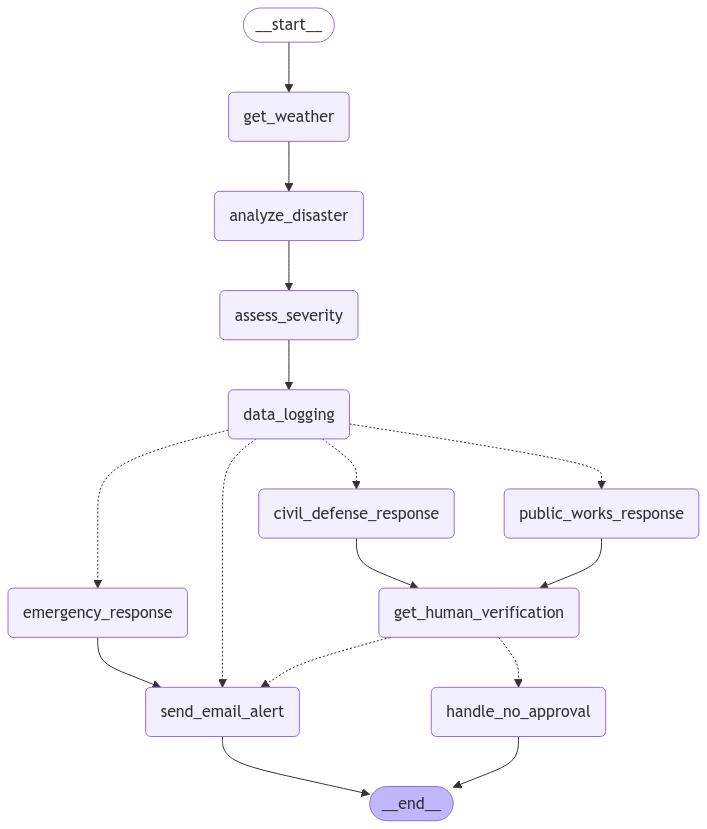

In [ ]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

================================================================================================================

## **To check with Simulator of High Severity Weather level check with dummy weather and Social Monitoring data**


## **Note:** Below, only details are given for nodes or functions, which are not described above

================================================================================================================

# Weather Emergency Response System

This Python program automates a **Weather Emergency Response System** that monitors weather conditions, analyzes disasters, and generates emergency response plans. It integrates weather data from the OpenWeatherMap API and simulated scenarios for testing.

---

## Key Features

### Workflow Management
- Uses **StateGraph** to manage the process flow from weather data retrieval to response generation.

### Weather Data Handling
- Fetches live weather data from the **OpenWeatherMap API** or uses pre-defined simulated data for testing.

### Disaster Analysis
- Analyzes weather conditions using a generative AI model (**gemini-1.5-flash**) to identify potential disasters and assess their severity:
  - **Critical**
  - **High**
  - **Medium**
  - **Low**

### Response Plans
- Generates emergency, civil defense, and public works response plans based on disaster type and severity.

### Human Verification
- Requires human approval for **Low/Medium** severity alerts while auto-approving **High/Critical** ones.

### Email Notifications
- Sends detailed email alerts with disaster details and response plans using **SMTP**.

### Data Logging
- Logs all weather data, analysis, and responses to a local file for auditing.

### Test Mode
- Offers simulated scenarios for testing system behavior with **High**, **Medium**, and **Low** severity cases.

### Scheduling
- Schedules regular monitoring for specified cities using the **schedule** library.

---

## Workflow Steps

1. **Weather Data Retrieval**
   - Gathers weather details for a city using the OpenWeatherMap API.

2. **Social Media Monitoring**
   - Simulates analysis of social media reports for corroborative weather information.

3. **Disaster Identification**
   - AI-based disaster analysis categorizes weather conditions into disaster types.

4. **Severity Assessment**
   - AI evaluates the disaster's severity level.

5. **Response Generation**
   - Generates tailored response plans for emergencies, civil defense, or public works.

6. **Human Approval**
   - Requires user verification for **Low/Medium** severity situations.

7. **Email Alert**
   - Sends automated alerts to predefined recipients.

8. **Logging**
   - Saves all event details to a log file.

---

## Running Modes

### Normal Monitoring
- Fetches live weather data and runs scheduled checks for defined cities.

### Test Mode
- Allows testing with pre-configured scenarios to validate system responses.

---

## Purpose

This system provides a robust framework for real-time weather monitoring, disaster analysis, and automated responses, making it suitable for emergency management applications.


##  **1. Installation of Required Packages**

In [ ]:
%%capture --no-stderr
%pip install -U langgraph langsmith langchain langchain_google_genai langchain_community schedule

## **2. Call Credentials and Set API Keys:**

In [ ]:
import os
from google.colab import userdata
gemini_api_key = userdata.get('GEMINI_API_KEY')
API_KEY = userdata.get('W_API_KEY')
os.environ["API_KEY"] = API_KEY
os.environ["GOOGLE_API_KEY"] = gemini_api_key

## **3. Standard Library Imports**

In [ ]:
import os
import random
import requests
import schedule
import time
from typing import Dict, TypedDict, Union, List, Literal
import json
from datetime import datetime
from langgraph.graph import StateGraph, END
from langchain_core.prompts import ChatPromptTemplate
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

## **4. Defining an LLM and a State Class**

In [ ]:
# Initialize LLM
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

class WeatherState(TypedDict):
    city: str
    weather_data: Dict
    disaster_type: str
    severity: str
    response: str
    messages: List[Union[SystemMessage, HumanMessage, AIMessage]]
    alerts: List[str]
    social_media_reports: List[str]
    human_approved: bool

## **5. Define Node Functions**

#### **(a) Fetching Weather Data**

In [ ]:
def get_weather_data(state: WeatherState) -> Dict:
    """Fetch weather data from OpenWeatherMap API or use simulated data in test mode"""
    # Check if we're in test mode (indicated by pre-populated weather_data)
    if state['weather_data']:
        return {
            **state,
            "messages": state["messages"] + [SystemMessage(content=f"Using simulated weather data for {state['city']}")]
        }

    # If not in test mode, fetch real data from API
    BASE_URL = "http://api.openweathermap.org/data/2.5/weather"
    API_KEY = os.getenv("API_KEY")

    request_url = f"{BASE_URL}?appid={API_KEY}&q={state['city']}"
    try:
        response = requests.get(request_url)
        response.raise_for_status()

        data = response.json()
        weather_data = {
            "weather": data.get('weather', [{}])[0].get("description", "N/A"),
            "wind_speed": data.get("wind", {}).get("speed", "N/A"),
            "cloud_cover": data.get("clouds", {}).get("all", "N/A"),
            "sea_level": data.get("main", {}).get("sea_level", "N/A"),
            "temperature": round(data.get("main", {}).get("temp", 273.15) - 273.15, 1),
            "humidity": data.get("main", {}).get("humidity", "N/A"),
            "pressure": data.get("main", {}).get("pressure", "N/A")
        }

        return {
            **state,
            "weather_data": weather_data,
            "messages": state["messages"] + [SystemMessage(content=f"Weather data fetched successfully for {state['city']}")]
        }
    except Exception as e:
        error_data = {
            "weather": "N/A",
            "wind_speed": "N/A",
            "cloud_cover": "N/A",
            "sea_level": "N/A",
            "temperature": "N/A",
            "humidity": "N/A",
            "pressure": "N/A"
        }
        return {
            **state,
            "weather_data": error_data,
            "messages": state["messages"] + [SystemMessage(content=f"Failed to fetch weather data for {state['city']}: {str(e)}")]
        }

#### **(b) Social Media Monitoring**


In [ ]:
def social_media_monitoring(state: WeatherState) -> WeatherState:
    """Simulate monitoring social media for additional reports of the weather event."""
    simulated_reports = [
        "Local reports of rising water levels and minor flooding.",
        "High winds causing power outages in parts of the city.",
        "Citizens reporting high temperatures and increased heat discomfort.",
        "Social media reports indicate severe storm damage in local infrastructure.",
        "Reports of traffic disruptions due to heavy rain.",
        "No unusual social media reports related to the weather at this time."
    ]

    social_media_report = random.choice(simulated_reports)
    return {
        **state,
        "social_media_reports": state["social_media_reports"] + [social_media_report],
        "messages": state["messages"] + [SystemMessage(content=f"Social media report added: {social_media_report}")]
    }

**Simulating Social Media Monitoring**

**Function: `social_media_monitoring`**

---

### **Purpose**

Enhances the weather monitoring system by simulating the gathering of weather-related updates from social media platforms.

---

### **Key Features**

1. **Randomized Report Selection**
   - **Process**: Randomly selects a weather-related report from a predefined list of updates.
   - **Purpose**: Adds variety and external input simulation to the monitoring system.

2. **State Updates**
   - **Field**: Adds the selected report to the `social_media_reports` field in the system state.
   - **Purpose**: Keeps track of simulated external inputs for further processing or analysis.

3. **Message Logging**
   - **Field**: Logs the update in the `messages` field of the state.
   - **Purpose**: Provides a detailed record of received and processed social media updates.

---

### **System Enhancement**

- **Simulated External Inputs**: Incorporates pseudo-real-time updates to improve the system's situational awareness.
- **Comprehensive Monitoring**: Complements weather data from APIs with additional simulated insights for better decision-making.


#### **(c) Analyzing Disaster Type**


In [ ]:
def analyze_disaster_type(state: WeatherState) -> WeatherState:
    """Analyze weather data to identify potential disasters"""
    weather_data = state["weather_data"]
    prompt = ChatPromptTemplate.from_template(
        "Based on the following weather conditions, identify if there's a potential weather disaster.\n"
        "Weather conditions:\n"
        "- Description: {weather}\n"
        "- Wind Speed: {wind_speed} m/s\n"
        "- Temperature: {temperature}°C\n"
        "- Humidity: {humidity}%\n"
        "- Pressure: {pressure} hPa\n"
        "Categorize into one of these types: Hurricane, Flood, Heatwave, Severe Storm, Winter Storm, or No Immediate Threat"
    )

    try:
        chain = prompt | llm
        disaster_type = chain.invoke(weather_data).content
        return {
            **state,
            "disaster_type": disaster_type,
            "messages": state["messages"] + [SystemMessage(content=f"Disaster type identified: {disaster_type}")]
        }
    except Exception as e:
        return {
            **state,
            "disaster_type": "Analysis Failed",
            "messages": state["messages"] + [SystemMessage(content=f"Failed to analyze disaster type: {str(e)}")]
        }

#### **(d) Assess Severity Level**


In [ ]:
def assess_severity(state: WeatherState) -> WeatherState:
    """Assess the severity of the identified weather situation"""
    weather_data = state["weather_data"]
    prompt = ChatPromptTemplate.from_template(
        "Given the weather conditions and identified disaster type '{disaster_type}', "
        "assess the severity level. Consider:\n"
        "- Weather: {weather}\n"
        "- Wind Speed: {wind_speed} m/s\n"
        "- Temperature: {temperature}°C\n"
        "Respond with either 'Critical', 'High', 'Medium', or 'Low'"
    )

    try:
        chain = prompt | llm
        severity = chain.invoke({
            **weather_data,
            "disaster_type": state["disaster_type"]
        }).content

        return {
            **state,
            "severity": severity,
            "messages": state["messages"] + [SystemMessage(content=f"Severity assessed as: {severity}")]
        }
    except Exception as e:
        return {
            **state,
            "severity": "Assessment Failed",
            "messages": state["messages"] + [SystemMessage(content=f"Failed to assess severity: {str(e)}")]
        }

#### **(e) Emergency Response**

In [ ]:
def emergency_response(state: WeatherState) -> WeatherState:
    """Generate emergency response plan"""
    prompt = ChatPromptTemplate.from_template(
        "Create an emergency response plan for a {disaster_type} situation "
        "with {severity} severity level in {city}. Include immediate actions needed."
    )
    try:
        chain = prompt | llm
        response = chain.invoke({
            "disaster_type": state["disaster_type"],
            "severity": state["severity"],
            "city": state["city"]
        }).content

        return {
            **state,
            "response": response,
            "messages": state["messages"] + [SystemMessage(content="Emergency response plan generated")]
        }
    except Exception as e:
        return {
            **state,
            "response": "Failed to generate response plan",
            "messages": state["messages"] + [SystemMessage(content=f"Failed to generate emergency response: {str(e)}")]
        }

#### **(f) Civil Defense Response**

In [ ]:
def civil_defense_response(state: WeatherState) -> WeatherState:
    """Generate civil defense response plan"""
    prompt = ChatPromptTemplate.from_template(
        "Create a civil defense response plan for a {disaster_type} situation "
        "with {severity} severity level in {city}. Focus on public safety measures."
    )
    try:
        chain = prompt | llm
        response = chain.invoke({
            "disaster_type": state["disaster_type"],
            "severity": state["severity"],
            "city": state["city"]
        }).content

        return {
            **state,
            "response": response,
            "messages": state["messages"] + [SystemMessage(content="Civil defense response plan generated")]
        }
    except Exception as e:
        return {
            **state,
            "response": "Failed to generate response plan",
            "messages": state["messages"] + [SystemMessage(content=f"Failed to generate civil defense response: {str(e)}")]
        }

#### **(g) Public Works Response**

In [ ]:
def public_works_response(state: WeatherState) -> WeatherState:
    """Generate public works response plan"""
    prompt = ChatPromptTemplate.from_template(
        "Create a public works response plan for a {disaster_type} situation "
        "with {severity} severity level in {city}. Focus on infrastructure protection."
    )
    try:
        chain = prompt | llm
        response = chain.invoke({
            "disaster_type": state["disaster_type"],
            "severity": state["severity"],
            "city": state["city"]
        }).content

        return {
            **state,
            "response": response,
            "messages": state["messages"] + [SystemMessage(content="Public works response plan generated")]
        }
    except Exception as e:
        return {
            **state,
            "response": "Failed to generate response plan",
            "messages": state["messages"] + [SystemMessage(content=f"Failed to generate public works response: {str(e)}")]
        }

#### **(h) Data Logging**

In [ ]:
def data_logging(state: WeatherState) -> WeatherState:
    """Log weather data, disaster analysis, and response to a file."""
    log_data = {
        "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "city": state["city"],
        "weather_data": state["weather_data"],
        "disaster_type": state["disaster_type"],
        "severity": state["severity"],
        "response": state["response"],
        "social_media_reports": state["social_media_reports"]
    }

    try:
        with open("disaster_log.txt", "a") as log_file:
            log_file.write(json.dumps(log_data) + "\n")

        return {
            **state,
            "messages": state["messages"] + [SystemMessage(content="Data logged successfully")]
        }
    except Exception as e:
        return {
            **state,
            "messages": state["messages"] + [SystemMessage(content=f"Failed to log data: {str(e)}")]
        }


#### **(j) Get Human Verification**

In [ ]:
def get_human_verification(state: WeatherState) -> WeatherState:
    """Get human verification for low/medium severity alerts"""
    severity = state["severity"].strip().lower()

    if severity in ["low", "medium"]:
        print("\n" + "="*50)
        print(f"Low/Medium severity alert for {state['city']} requires human approval:")
        print(f"Disaster Type: {state['disaster_type']}")
        print(f"Current Weather: {state['weather_data']['weather']}")
        print(f"Temperature: {state['weather_data']['temperature']}°C")
        print(f"Wind Speed: {state['weather_data']['wind_speed']} m/s")
        print(f"Severity: {state['severity']}")
        print(f"Response Plan: {state['response']}")
        print("\nType 'y' to approve sending alert or 'n' to reject (waiting for input):")
        print("="*50)

        # Block and wait for input
        while True:
            try:
                user_input = input().lower().strip()
                if user_input in ['y', 'n']:
                    approved = user_input == 'y'
                    print(f"Human verification result: {'Approved' if approved else 'Rejected'}")
                    break
                else:
                    print("Please enter 'y' for yes or 'n' for no:")
            except Exception as e:
                print(f"Error reading input: {str(e)}")
                print("Please try again with 'y' or 'n':")

        return {
            **state,
            "human_approved": approved,
            "messages": state["messages"] + [
                SystemMessage(content=f"Human verification: {'Approved' if approved else 'Rejected'}")
            ]
        }
    else:
        # Auto-approve for high/critical severity
        return {
            **state,
            "human_approved": True,
            "messages": state["messages"] + [
                SystemMessage(content=f"Auto-approved {severity} severity alert")
            ]
        }

#### **(k) Send Email Alert**

In [ ]:
def send_email_alert(state: WeatherState) -> WeatherState:
    """Send weather alert email"""
    sender_email = os.getenv("SENDER_EMAIL")
    receiver_email = os.getenv("RECEIVER_EMAIL")
    password = os.getenv("EMAIL_PASSWORD")

    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = receiver_email
    msg['Subject'] = f"Weather Alert: {state['severity']} severity weather event in {state['city']}"

    body = format_weather_email(state)
    msg.attach(MIMEText(body, 'plain'))

    try:
        server = smtplib.SMTP("smtp.gmail.com", 587)
        server.starttls()
        server.login(sender_email, password)
        text = msg.as_string()
        server.sendmail(sender_email, receiver_email, text)
        server.quit()

        # Add confirmation message
        severity = state["severity"].strip().lower()
        if severity in ["low", "medium"]:
            print(f"\nVerification was approved by human, Email sent to {receiver_email} successfully")
        else:
            print(f"\nEmail sent successfully for high severity alert to {receiver_email}")

        return {
            **state,
            "messages": state["messages"] + [SystemMessage(content=f"Successfully sent weather alert email for {state['city']}")],
            "alerts": state["alerts"] + [f"Email alert sent: {datetime.now()}"]
        }

    except Exception as e:
        return {
            **state,
            "messages": state["messages"] + [SystemMessage(content=f"Failed to send email alert: {str(e)}")]
        }

#### **(l) Handle No Approval From Human**

In [ ]:
def handle_no_approval(state: WeatherState) -> WeatherState:
    """Handle cases where human verification was rejected"""
    print("\nVerification was not approved by human, Email not sent")

    message = (
        f"Alert not sent for {state['city']} - "
        f"Weather severity level '{state['severity']}' was deemed non-critical "
        f"by human operator and verification was rejected."
    )
    return {
        **state,
        "messages": state["messages"] + [SystemMessage(content=message)]
    }

#### **(m) Route Response for Disaster Type and Severity**

In [ ]:
def route_response(state: WeatherState) -> Literal["emergency_response", "send_email_alert", "civil_defense_response", "public_works_response"]:
    """Route to appropriate department based on disaster type and severity"""
    disaster = state["disaster_type"].strip().lower()
    severity = state["severity"].strip().lower()

    if severity in ["critical", "high"]:
        return "emergency_response"
        return "send_email_alert"
    elif "flood" in disaster or "storm" in disaster:
        return "public_works_response"
    else:
        return "civil_defense_response"

#### **(n) Verify Approval Route after Human Verification**

In [ ]:
def verify_approval_router(state: WeatherState) -> Literal["send_email_alert", "handle_no_approval"]:
    """Route based on human approval decision"""
    return "send_email_alert" if state['human_approved'] else "handle_no_approval"

#### **(p) Format Weather Email**

In [ ]:
def format_weather_email(state: WeatherState) -> str:
    """Format weather data and severity assessment into an email message"""
    weather_data = state["weather_data"]
    social_media_reports = "\n".join(state["social_media_reports"])

    email_content = f"""
Weather Alert for {state['city']}

Disaster Type: {state['disaster_type']}
Severity Level: {state['severity']}

Current Weather Conditions:
- Weather Description: {weather_data['weather']}
- Temperature: {weather_data['temperature']}C
- Wind Speed: {weather_data['wind_speed']} m/s
- Humidity: {weather_data['humidity']}%
- Pressure: {weather_data['pressure']} hPa
- Cloud Cover: {weather_data['cloud_cover']}%


Response Plan:
{state['response']}

This is an automated weather alert generated at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
"""

    if state['severity'].lower() in ['low', 'medium']:
        email_content += "\nNote: This low/medium severity alert has been verified by a human operator."

    return email_content

## **5. Creating and Compiling the Workflow**

In [ ]:
# Create the workflow
workflow = StateGraph(WeatherState)

# Add nodes
workflow.add_node("get_weather", get_weather_data)
workflow.add_node("social_media_monitoring", social_media_monitoring)
workflow.add_node("analyze_disaster", analyze_disaster_type)
workflow.add_node("assess_severity", assess_severity)
workflow.add_node("data_logging", data_logging)
workflow.add_node("emergency_response", emergency_response)
workflow.add_node("civil_defense_response", civil_defense_response)
workflow.add_node("public_works_response", public_works_response)
workflow.add_node("get_human_verification", get_human_verification)
workflow.add_node("send_email_alert", send_email_alert)
workflow.add_node("handle_no_approval", handle_no_approval)

# Add edges
workflow.add_edge("get_weather", "social_media_monitoring")
workflow.add_edge("social_media_monitoring", "analyze_disaster")
workflow.add_edge("analyze_disaster", "assess_severity")
workflow.add_edge("assess_severity", "data_logging")
workflow.add_conditional_edges("data_logging", route_response)

workflow.add_edge("civil_defense_response", "get_human_verification")
workflow.add_edge("public_works_response", "get_human_verification")
workflow.add_conditional_edges("get_human_verification", verify_approval_router)
workflow.add_edge("emergency_response", "send_email_alert")
workflow.add_edge("send_email_alert", END)
workflow.add_edge("handle_no_approval", END)

workflow.set_entry_point("get_weather")

# Compile the workflow
app = workflow.compile()

##  **6 Running the Weather Emergency System**

#### **(a) run_weather_emergency_system(city: str):**


In [ ]:
def run_weather_emergency_system(city: str):
    """Initialize and run the weather emergency system for a given city"""
    initial_state = {
        "city": city,
        "weather_data": {},
        "disaster_type": "",
        "severity": "",
        "response": "",
        "messages": [],
        "alerts": [],
        "social_media_reports": [],
        "human_approved": False
    }

    try:
        result = app.invoke(initial_state)
        print(f"Completed weather check for {city}")
        return result
    except Exception as e:
        print(f"Error running weather emergency system: {str(e)}")

#### **(b) Get Simulated Weather Data:**

In [ ]:
def get_simulated_weather_data(scenario: str = "high") -> Dict:
    """Generate simulated weather data for testing different scenarios"""
    scenarios = {
        "high": {
            "weather": "severe thunderstorm with heavy rainfall and strong winds",
            "wind_speed": 32.5,  # Increased for high severity
            "cloud_cover": 95,
            "sea_level": 1015,
            "temperature": 35.5,  # Higher temperature
            "humidity": 90,
            "pressure": 960  # Low pressure indicating severe weather
        },
        "medium": {
            "weather": "moderate rain with gusty winds",
            "wind_speed": 15.2,
            "cloud_cover": 75,
            "sea_level": 1012,
            "temperature": 22.3,
            "humidity": 70,
            "pressure": 1005
        },
        "low": {
            "weather": "light drizzle",
            "wind_speed": 8.5,
            "cloud_cover": 45,
            "sea_level": 1013,
            "temperature": 20.1,
            "humidity": 60,
            "pressure": 1015
        }
    }

    return scenarios.get(scenario.lower(), scenarios["medium"])


#### **(c) Run Weather Emergency System Test**

In [ ]:
def run_weather_emergency_system_test(city: str, scenario: str = "high"):
    """Test the weather emergency system with simulated data"""
    # Pre-populate with simulated data
    initial_state = {
        "city": city,
        "weather_data": get_simulated_weather_data(scenario),
        "disaster_type": "",
        "severity": "",
        "response": "",
        "messages": [],
        "alerts": [],
        "social_media_reports": [],
        "human_approved": False
    }

    try:
        result = app.invoke(initial_state)
        print(f"\nCompleted test weather check for {city} with {scenario} severity scenario")
        return result
    except Exception as e:
        print(f"Error running weather emergency system test: {str(e)}")



### **Purpose**

Tests the Weather Emergency System using simulated weather data to ensure workflow reliability and robustness.

---

### **Key Features**

1. **Scenario-Based Testing**
   - **Input**: Accepts a predefined scenario (e.g., `"high"` severity).
   - **Data Simulation**: Uses `get_simulated_weather_data(scenario)` to initialize a test state with relevant simulated weather data.

2. **Workflow Execution**
   - **Process**: Executes the workflow using `app.invoke` with the test state.
   - **Purpose**: Validates the system's functionality in handling the simulated scenario.

3. **Result Logging**
   - **Logs**: Captures and records the results of the test run.
   - **Purpose**: Provides insights into system behavior and outcomes for debugging or evaluation.

4. **Error Handling**
   - **Graceful Management**: Catches and manages errors during the test run.
   - **Purpose**: Ensures uninterrupted testing and meaningful error reports.

---

### **System Benefits**

- **Robustness Validation**: Ensures the system handles various scenarios effectively.
- **Simulated Environment**: Enables safe testing without impacting live data or workflows.
- **Error Detection**: Identifies and logs potential issues for resolution before deployment.
---





---

#### **(d) Run Main Function**

### **Note:** you can change below receiver email with yours to check that Whether email notifications are working or not

In [ ]:
def main():
    """Main function to run the weather emergency system"""
    # Set up environment variables

    os.environ["SENDER_EMAIL"] = "asif.ml.developer@gmail.com"  # please no change this
    os.environ["RECEIVER_EMAIL"] = "imransecrets@gmail.com"  # Recipient email you can change and checked
    os.environ["EMAIL_PASSWORD"] = "iulr lsdb glfy pfbs"  # please no change this

    # Add test mode option
    print("\nWeather Emergency Response System")
    print("1. Run normal monitoring")
    print("2. Run test with simulated data")
    choice = input("Select mode (1 or 2): ")

    if choice == "2":
        print("\nSelect test scenario:")
        print("1. High severity (no human verification needed)")
        print("2. Medium severity (requires human verification)")
        print("3. Low severity (requires human verification)")

        scenario_choice = input("Select scenario (1, 2, or 3): ")
        scenario_map = {"1": "high", "2": "medium", "3": "low"}
        scenario = scenario_map.get(scenario_choice, "medium")

        city = input("\nEnter city name for test (default: Lahore): ").strip() or "Lahore"
        print(f"\nRunning test scenario: {scenario.upper()} severity for {city}")
        run_weather_emergency_system_test(city, scenario)
    else:
        def scheduled_check():
            """Function to perform scheduled checks for multiple cities"""
            cities = ['Lahore']  # Add more cities as needed
            print(f"\nStarting scheduled check at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

            for city in cities:
                try:
                    print(f"\nChecking weather conditions for {city}...")
                    run_weather_emergency_system(city)
                    time.sleep(2)  # Brief pause between cities
                except Exception as e:
                    print(f"Error checking {city}: {str(e)}")

        # Schedule checks every minut
        schedule.every(1).minute.do(scheduled_check)
        print("Weather Emergency Response System started.")
        print("Monitoring scheduled for every minute.")

        while True:
            try:
                schedule.run_pending()
                time.sleep(1)
            except KeyboardInterrupt:
                print("\nShutting down Weather Emergency Response System...")
                break
            except Exception as e:
                print(f"Error in main loop: {str(e)}")
                time.sleep(1)

if __name__ == "__main__":
    main()


Weather Emergency Response System
1. Run normal monitoring
2. Run test with simulated data
Select mode (1 or 2): 2

Select test scenario:
1. High severity (no human verification needed)
2. Medium severity (requires human verification)
3. Low severity (requires human verification)
Select scenario (1, 2, or 3): 1

Enter city name for test (default: Lahore): New York

Running test scenario: HIGH severity for New York

Email sent successfully for high severity alert to imransecrets@gmail.com

Completed test weather check for New York with high severity scenario


# **Note: In above code if you want to use:**

*   `Real Data` then choose option 1 (Here run code normal as above)
*   and if you want to `dummy simulated data` then choose 2 with `high severity` to check that when high severity is happen then email notification sent without human verification.




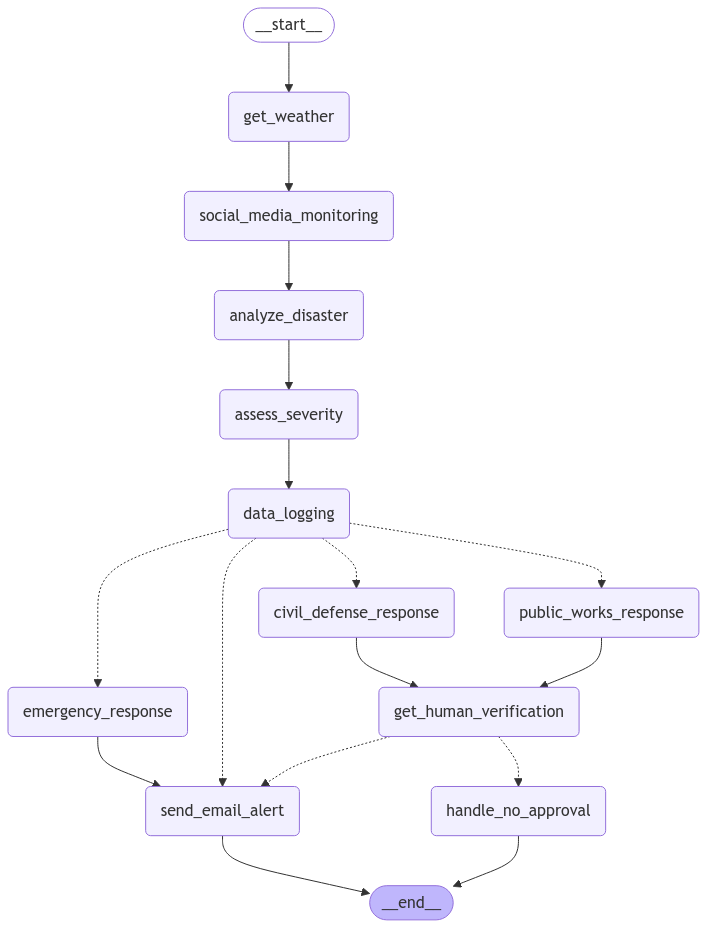

In [ ]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass